In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
# there is no null values in the given data set

In [4]:
df.shape

(14999, 10)

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [ ]:
# there are 2 categorical features in a given data set (department and salary)

In [6]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
department                10
salary                     3
dtype: int64

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# handling duplicates

In [6]:
df.duplicated(keep="first").sum()

3008

In [7]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(11991, 10)

In [18]:
df["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

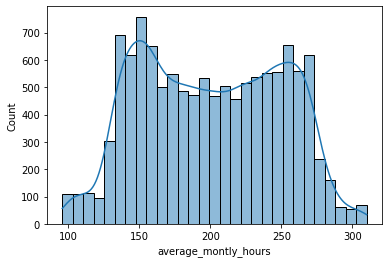

In [11]:
sns.histplot(df["average_montly_hours"],kde=True)

In [ ]:
# from the above histplot, most people work around 150 hours in a month 

In [13]:
 df.groupby(['left'])['average_montly_hours'].mean()

left
0    198.94270
1    208.16223
Name: average_montly_hours, dtype: float64

In [ ]:
# employees left the company whose  working hours above 200 hours or avg working hours=208

In [ ]:
# number_project  

In [15]:
df['number_project'].value_counts()  # more number of employees working in 4 projects and then 3 projects

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

<AxesSubplot:xlabel='no of projects', ylabel='no of employees'>

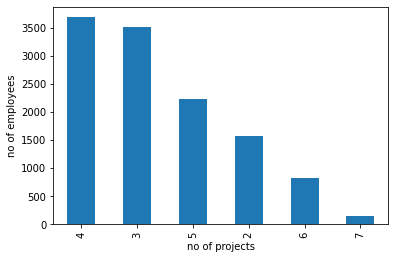

In [16]:
df['number_project'].value_counts().plot.bar(xlabel="no of projects",ylabel='no of employees')

In [ ]:
# most of the employees doing 4 projects, only less employees are doing 7 projects

<AxesSubplot:xlabel='no of projects', ylabel='employees left'>

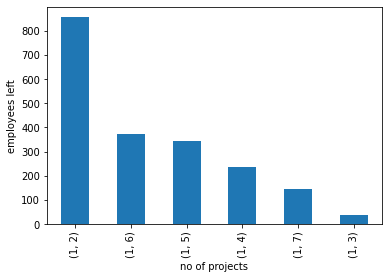

In [17]:
df.loc[df["left"]!=0,["left","number_project"]].value_counts().plot.bar(xlabel="no of projects",ylabel="employees left")

In [ ]:
# most of the employees who have alloted 2 projects left the company 
and less number of employees left the company who hav allotted 3 projects

# promotion_last_5years 

In [19]:
df["promotion_last_5years"].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [20]:
df.loc[df["left"]!=0,["left","number_project","promotion_last_5years"]].value_counts()

left  number_project  promotion_last_5years
1     2               0                        852
      6               0                        370
      5               0                        343
      4               0                        235
      7               0                        145
      3               0                         38
      2               1                          5
      4               1                          2
      6               1                          1
dtype: int64

In [ ]:
# from the above,it was identified that most of the employees left the job due to "no promotions in last 5 years"
# they did not given promotion in last 5 years for the employees who have taken up only 2 projects.

In [21]:
df[["number_project","promotion_last_5years"]].value_counts()

number_project  promotion_last_5years
4               0                        3609
3               0                        3458
5               0                        2200
2               0                        1563
6               0                         813
7               0                         145
4               1                          76
3               1                          62
5               1                          33
2               1                          19
6               1                          13
dtype: int64

In [22]:
df.loc[df["promotion_last_5years"]==1,["number_project","promotion_last_5years"]].value_counts()

number_project  promotion_last_5years
4               1                        76
3               1                        62
5               1                        33
2               1                        19
6               1                        13
dtype: int64

In [ ]:
#  out of 11,991 employees,they have given promotion only for 203 employees,
out of 203 employees,promotion got to the employees who have alloted to 4 projects,and 3 projects
no promotion in last 5years to employees who have taken up 7 projects

In [23]:
df.loc[df["promotion_last_5years"]!=0,["left","number_project","promotion_last_5years"]].value_counts()

left  number_project  promotion_last_5years
0     4               1                        74
      3               1                        62
      5               1                        33
      2               1                        14
      6               1                        12
1     2               1                         5
      4               1                         2
      6               1                         1
dtype: int64

In [ ]:
# here,employees who got promotion,but left the job due to less projects or more projects assigned

In [ ]:
# salary

In [24]:
df["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [25]:
labels=df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

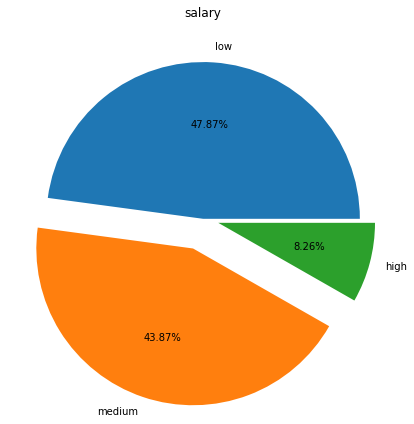

In [26]:
plt.figure(figsize=(8,6))
plt.pie(x=df["salary"].value_counts(),labels=labels,autopct="%1.2f%%",explode=[0,0.2,0.1])
plt.title("salary")
plt.tight_layout()
plt.show()

In [ ]:
# only 8% of the employees getting high salary

In [27]:
df.loc[df["left"]==1,["left","salary"]].value_counts()

left  salary
1     low       1174
      medium     769
      high        48
dtype: int64

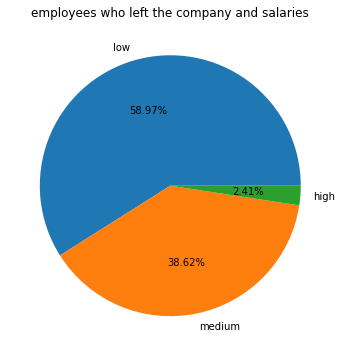

In [28]:
plt.figure(figsize=(8,6))
plt.pie(df.loc[df["left"]==1,["left","salary"]].value_counts(),labels=labels,autopct="%1.2f%%")
plt.title("employees who left the company and salaries")
plt.show()

In [ ]:
# employees left the company who have low salaries

In [29]:
df.loc[df["left"]==1,["left","number_project","salary"]].value_counts()

left  number_project  salary
1     2               low       512
                      medium    322
      6               low       221
      5               low       198
      6               medium    141
      4               low       140
      5               medium    134
      4               medium     95
      7               low        82
                      medium     61
      2               high       23
      3               low        21
                      medium     16
      5               high       11
      6               high        9
      4               high        2
      7               high        2
      3               high        1
dtype: int64

In [ ]:
# employees left the company who have allotted for 2 projects,5 projects,and 6 projects with low and medium salaries

<AxesSubplot:xlabel='number_project', ylabel='Count'>

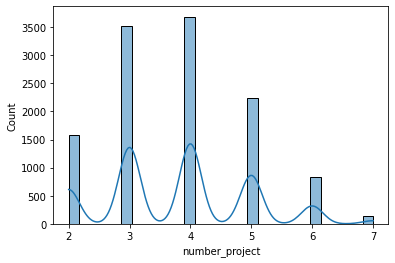

In [30]:
sns.histplot(df["number_project"],kde=True)

In [ ]:
# department

In [32]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

<AxesSubplot:>

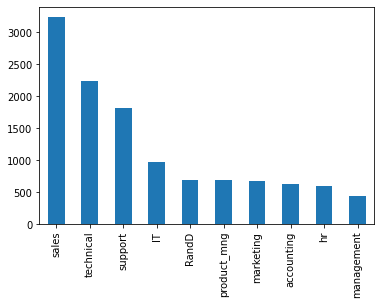

In [33]:
df['department'].value_counts().plot.bar()

In [31]:
df.loc[df["left"]!=0,["left","department"]].value_counts()

left  department 
1     sales          550
      technical      390
      support        312
      IT             158
      hr             113
      marketing      112
      product_mng    110
      accounting     109
      RandD           85
      management      52
dtype: int64

In [36]:
 df.loc[df["left"]==1,["department"]].value_counts()

department 
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
dtype: int64

In [ ]:
# more number of employees from "sales" department left the company

In [34]:
 df.loc[df["left"]==1,["department","number_project","promotion_last_5years"]].value_counts()

department  number_project  promotion_last_5years
sales       2               0                        249
technical   2               0                        149
support     2               0                        124
sales       6               0                         94
            5               0                         88
                                                    ... 
RandD       3               0                          1
technical   6               1                          1
sales       4               1                          1
management  3               0                          1
support     2               1                          1
Length: 65, dtype: int64

In [ ]:
# employees who are from sales,technical,support left the job due to no promotions and allotted projects are 2,6.

department 
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
dtype: int64

In [37]:
df.loc[df["left"]==1,["average_montly_hours"]].value_counts()

average_montly_hours
156                     34
135                     33
131                     31
143                     30
149                     30
                        ..
172                      1
169                      1
166                      1
165                      1
162                      1
Length: 164, dtype: int64

In [ ]:
# employees who left the company are working for about 131-156 hours on an average

In [38]:
df.groupby(["left"]) ["average_montly_hours"].mean()

left
0    198.94270
1    208.16223
Name: average_montly_hours, dtype: float64

In [39]:
df.groupby(["left"])["satisfaction_level","last_evaluation"].agg("mean")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,satisfaction_level,last_evaluation
left,,
0,0.667365,0.715667
1,0.440271,0.721783


In [ ]:
# data visualisation, analysing with different features

In [42]:
features=["number_project","department","time_spend_company","Work_accident","left","promotion_last_5years"]

In [43]:
features

['number_project',
 'department',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

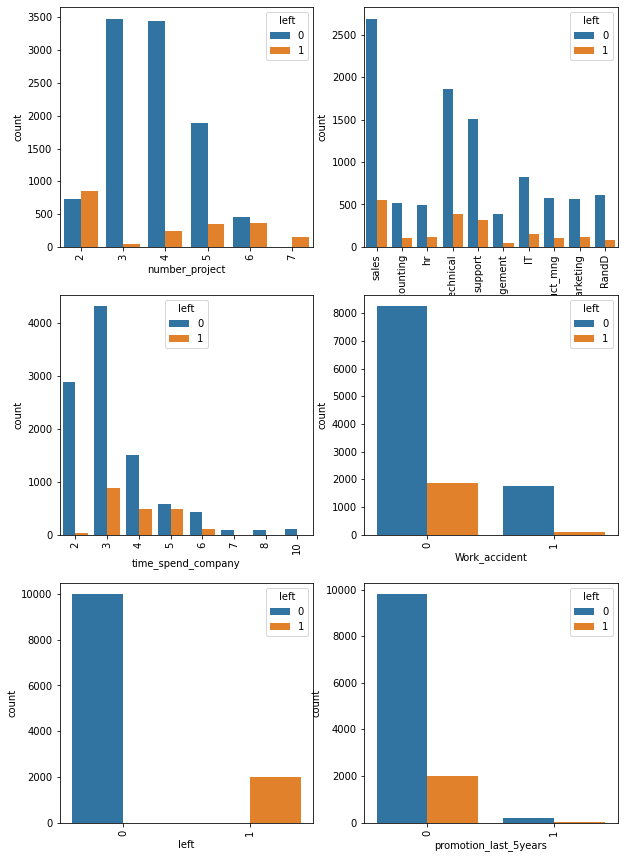

In [44]:
fig=plt.subplots(figsize=(10,15))
for p,q in enumerate(features):
    plt.subplot(3,2,p+1)
    sns.countplot(x=q,data=df,hue="left")
    plt.xticks(rotation=90)

In [45]:
features2=["satisfaction_level","last_evaluation"]
features2

['satisfaction_level', 'last_evaluation']

<AxesSubplot:xlabel='satisfaction_level', ylabel='count'>

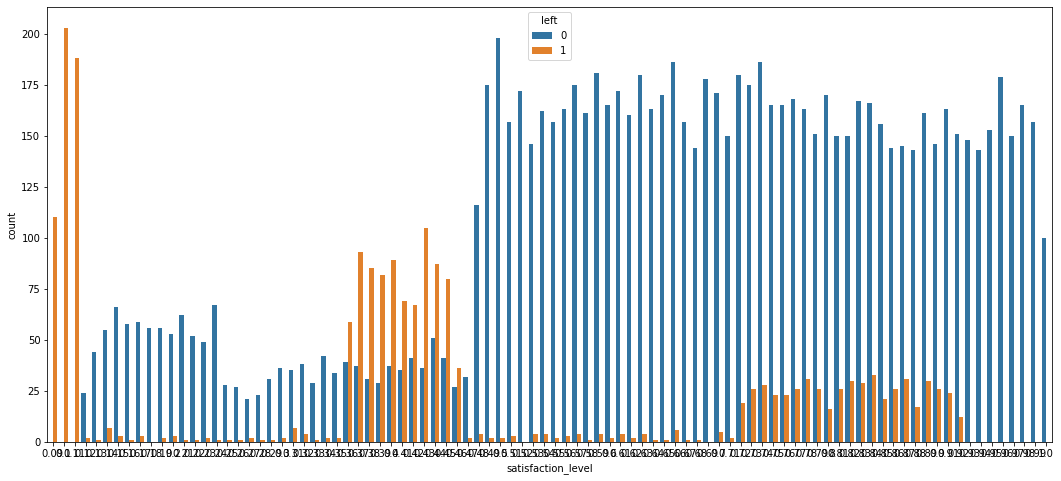

In [46]:
plt.figure(figsize=(18,8))
sns.countplot(x="satisfaction_level",data=df,hue="left")

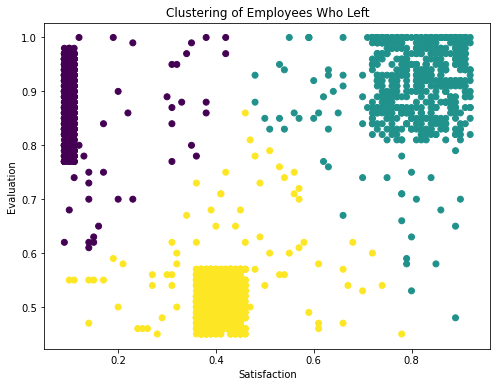

In [8]:
# Filter the data for employees who left,with cols satisfaction,evaluation
left_employees = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]
left_employees

# Perform clustering using K-means
from sklearn.cluster import KMeans
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(left_employees)

# Get the cluster labels
labels = kmeans.labels_
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
left_employees['cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(left_employees['satisfaction_level'], left_employees['last_evaluation'], c=labels, cmap='viridis')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.title('Clustering of Employees Who Left')
plt.show()


In [ ]:
# more number of employees with satisfaction level-0.4  left the company
# employees are leaving the job even though they are getting with good evaluation,beacuse they are not satisfied with job.

In [40]:
# pair plot

In [41]:
cols=df.columns
cols

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

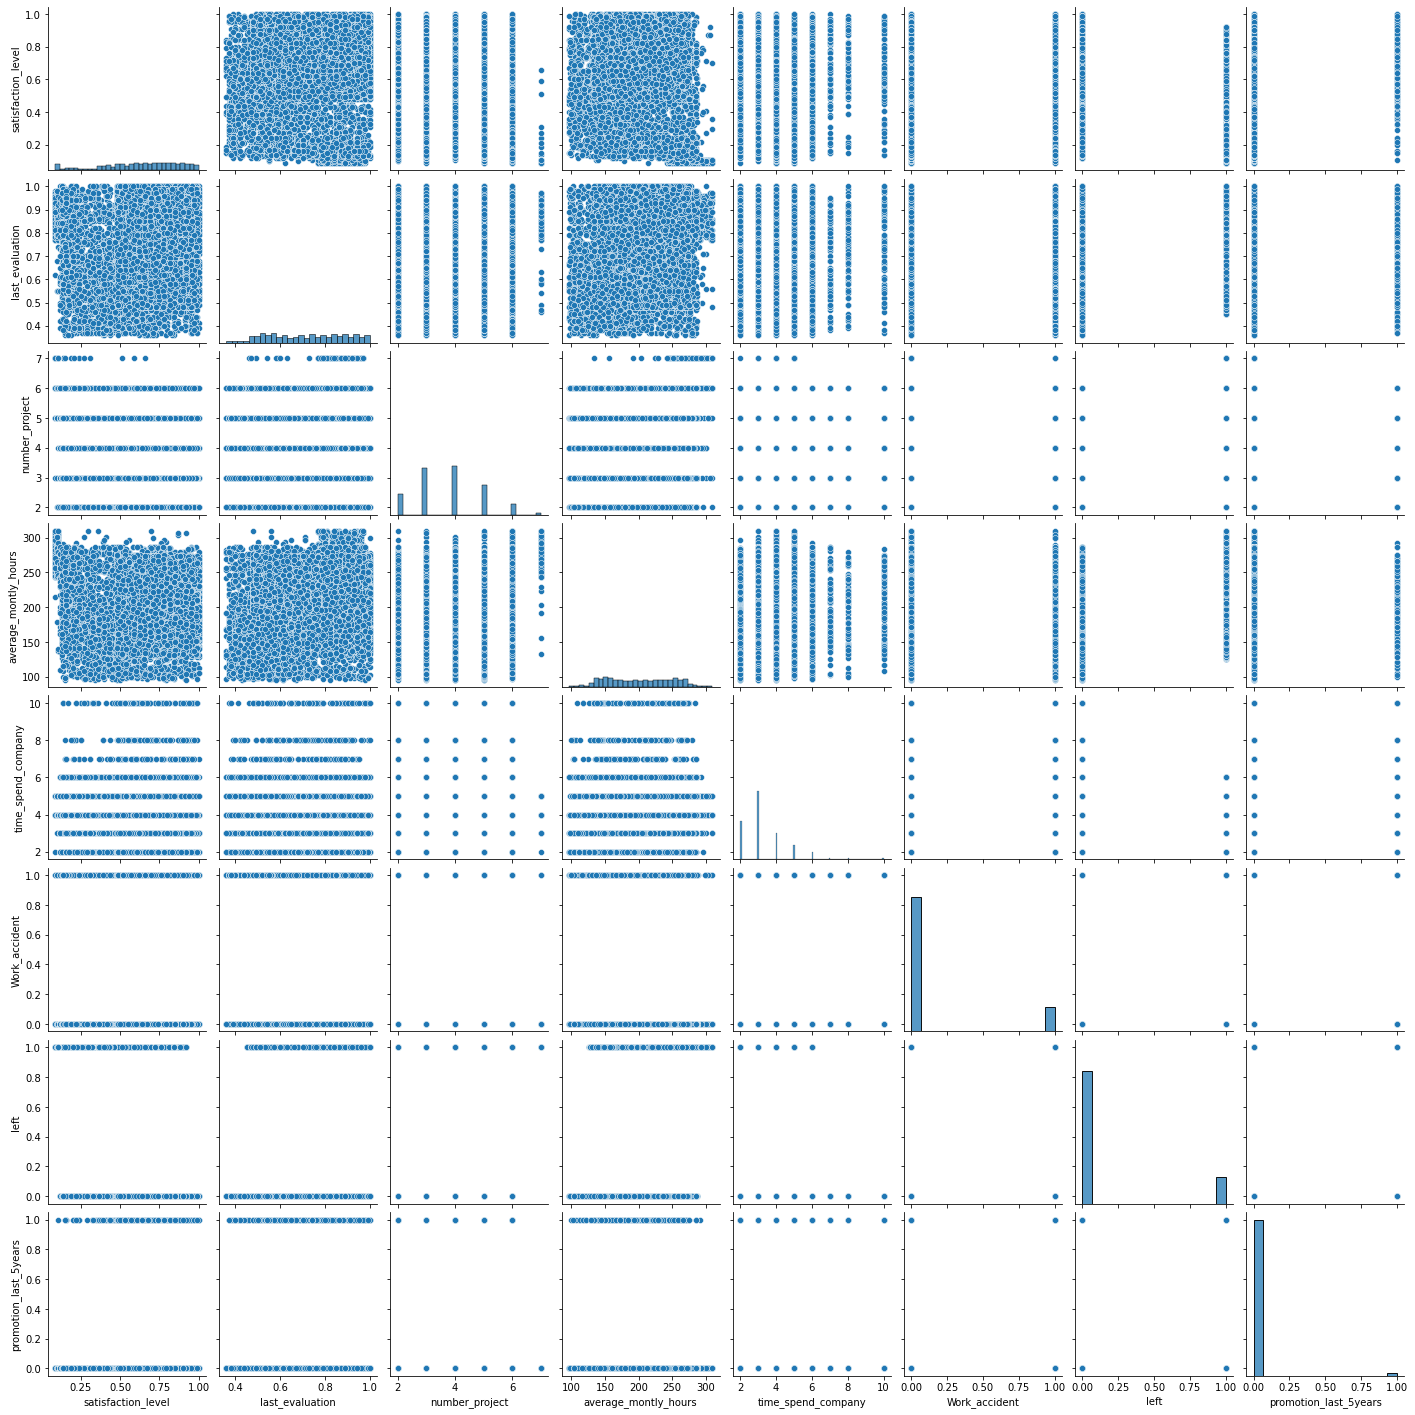

In [47]:
sns.pairplot(df[cols])

In [ ]:
# from the above pair plot,we can identify that there is no linear positive correlationship between 
features,
features are independent with each other

In [ ]:
# heat map

In [48]:
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


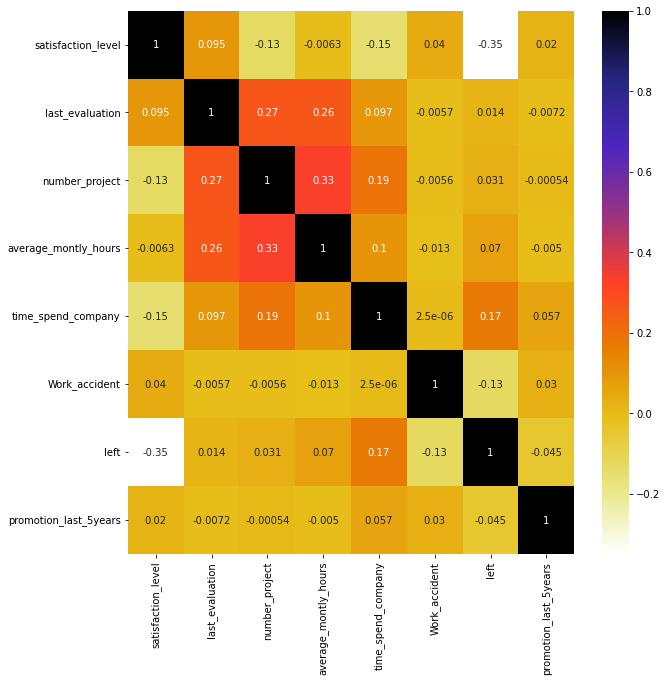

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# observations
1. from the above heat map/correlation matrix, we can identify that, highest correlation value is 0.33,(avg_monthly hours corresponding/ correlated with number_project)

# 2.here, features like "time spend company"(with correlation value 0.17) more correlated with "target(left)"

In [50]:
def correlation(dataset,threshold):
    col_corr =set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr    

In [51]:
corr_features=correlation(df,0.3)
len(set(corr_features))       

1

In [52]:
corr_features

{'average_montly_hours'}

# changing from categorical features  to numerical

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [ ]:
# 2 categorical features (department and salary)

In [ ]:
# applying label encoding to salary and department

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
labelencoder=LabelEncoder()

In [7]:
df["salary"]=labelencoder.fit_transform(df["salary"])

In [8]:
df["salary"].value_counts()

1    5740
2    5261
0     990
Name: salary, dtype: int64

In [9]:
df["department"]=labelencoder.fit_transform(df["department"])

In [10]:
df["department"].value_counts()

7    3239
9    2244
8    1821
0     976
1     694
6     686
5     673
2     621
3     601
4     436
Name: department, dtype: int64

In [11]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                 int64
salary                     int64
dtype: object

# splitting features(X) and target(y) columns

In [12]:
X=df.drop(["left"],axis=1)
y=df["left"]

# Resampling method
# handling imbalanced dataset
# Handle the "left Class" Imbalance using SMOTE technique.

In [13]:
df["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

<AxesSubplot:ylabel='left'>

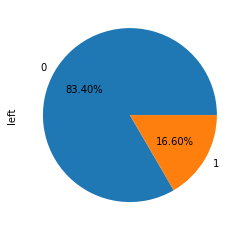

In [14]:
df["left"].value_counts().plot.pie(autopct="%1.2f%%")

In [ ]:
# "left" target feature is imbalanced(83:16) with 83% employees works with company 
and 16% employees left the company.
so,we will handle the data using "SMOTE technique" which is "over sampling"

In [15]:
from imblearn.combine import SMOTETomek

In [16]:
smk=SMOTETomek(random_state=42)
X_samp,y_samp=smk.fit_resample(X,y)


In [17]:
X_samp.shape,y_samp.shape

((19894, 9), (19894,))

In [ ]:
# checking for how many 0's and 1's ( original and resampled)

In [18]:
from collections import Counter
print("original dataset shape{}".format(Counter(y)))
print("resampled dataset shape{}".format(Counter(y_samp)))

original dataset shapeCounter({0: 10000, 1: 1991})
resampled dataset shapeCounter({1: 9947, 0: 9947})


# Performing K fold cross validation method

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation=KFold(3)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [21]:
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(),SVC(kernel='linear')]

In [ ]:
# comparing performance of models with K fold using a function

In [22]:
def compare_kfold():
    for algorithm in models:
        results=cross_val_score(algorithm,X,y,cv=kfold_validation)
        print("accuracy score of the",algorithm,"=",np.mean(results)*100)
        print(np.mean(results)*100)

In [23]:
compare_kfold()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy score of the LogisticRegression() = nan
nan
accuracy score of the KNeighborsClassifier() = 78.82578600617128
78.82578600617128
accuracy score of the DecisionTreeClassifier() = 80.88566424818615
80.88566424818615
accuracy score of the RandomForestClassifier() = 83.16237177883411
83.16237177883411
accuracy score of the SVC(kernel='linear') = nan
nan


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py", line 722, in _validate_targets
    % len(cls)
ValueError: The number of classes has to be greater than one; got 1 class

  warning

In [24]:
result1=cross_val_score(RandomForestClassifier(),X,y,cv=kfold_validation)
print(np.mean(result1)*100)

83.13735301476108


In [ ]:
# observations
The highest accuracy score identified for random forest classifier with 83%

## TRAIN TEST SPLIT MODEL

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X_samp,y_samp,test_size=0.2,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15915, 9)
(3979, 9)
(15915,)
(3979,)


In [27]:
def compare_models():
    for algorithm in models:
        algorithm.fit(X_train,y_train)
        prediction=algorithm.predict(X_test)
        accuracy=accuracy_score(y_test,prediction)
        print("accuracy score of the",algorithm,"=",accuracy)

In [28]:
compare_models()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy score of the LogisticRegression() = 0.8102538326212616
accuracy score of the KNeighborsClassifier() = 0.934154310128173
accuracy score of the DecisionTreeClassifier() = 0.9615481276702689
accuracy score of the RandomForestClassifier() = 0.9731088213118874
accuracy score of the SVC(kernel='linear') = 0.85272681578286


In [ ]:
# highest accuracy score is for random forest classifier 

# COMPARING FOR BOTH TRAIN AND TEST DATA

In [32]:
def compare_models_train_test():
    for algorithm in models:
        algorithm.fit(X_train,y_train)
        prediction_train=algorithm.predict(X_train)
        prediction_test=algorithm.predict(X_test)
        accuracy_train=accuracy_score(y_train,prediction_train)
        accuracy_test=accuracy_score(y_test,prediction_test)
        print("accuracy score of the train set",algorithm,"=",accuracy_train)
        print("accuracy score of the test set",algorithm,"=",accuracy_test)
        print(" --------------------------------------------------------------------------")

In [33]:
compare_models_train_test()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy score of the train set LogisticRegression() = 0.8015080113100849
accuracy score of the test set LogisticRegression() = 0.8102538326212616
 --------------------------------------------------------------------------
accuracy score of the train set KNeighborsClassifier() = 0.9535658184103047
accuracy score of the test set KNeighborsClassifier() = 0.934154310128173
 --------------------------------------------------------------------------
accuracy score of the train set DecisionTreeClassifier() = 1.0
accuracy score of the test set DecisionTreeClassifier() = 0.9585322945463685
 --------------------------------------------------------------------------
accuracy score of the train set RandomForestClassifier() = 1.0
accuracy score of the test set RandomForestClassifier() = 0.9746167378738376
 --------------------------------------------------------------------------
accuracy score of the train set SVC(kernel='linear') = 0.8434181589695257
accuracy score of the test set SVC(kernel='li

In [ ]:
# we can select randomforest classifier as a best algorithm to fit the model

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
my_rf_model=RandomForestClassifier().fit(X_train, y_train)

In [36]:
my_rf_preds_train = my_rf_model.predict(X_train)   # predictions
my_rf_preds_test=my_rf_model.predict(X_test)

In [37]:
print('accuracy on train set:',accuracy_score(y_train,my_rf_preds_train))  
print('accuracy on test set:',accuracy_score(y_test,my_rf_preds_test))

accuracy on train set: 1.0
accuracy on test set: 0.9733601407388791


# CONFUSION MATRIX

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [39]:
cnf_matrix=confusion_matrix(y_test,my_rf_preds_test)
cnf_matrix

array([[2022,   25],
       [  81, 1851]])

<AxesSubplot:>

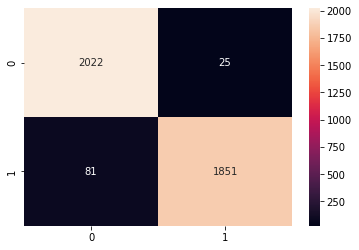

In [40]:
sns.heatmap(cnf_matrix,annot=True,fmt="d")

# the terms used in confusion matrix are true positive(TP),true negative(TN),false positive(FP),false negative(FN)
x-axis- predictions,
y-axis- actual

In [42]:
TN=cnf_matrix[0,0]
FP=cnf_matrix[0,1]
FN=cnf_matrix[1,0]
TP=cnf_matrix[1,1]

In [43]:
TN,FP,FN,TP

(2022, 25, 81, 1851)

# CLASSIFICATION REPORT

In [45]:
print("classification report on test data set",classification_report(y_test,my_rf_preds_test))

classification report on test data set               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2047
           1       0.99      0.96      0.97      1932

    accuracy                           0.97      3979
   macro avg       0.97      0.97      0.97      3979
weighted avg       0.97      0.97      0.97      3979



# ROC AUC CURVE

In [46]:
auc=roc_auc_score(y_test,my_rf_preds_test)
print("ROC_AUC score of  random forest classifier is",auc)

ROC_AUC score of  random forest classifier is 0.9729307697676042


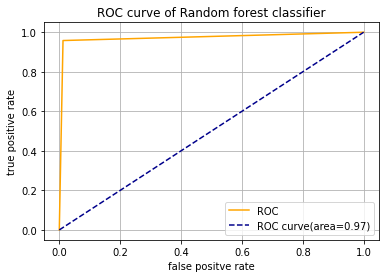

In [47]:
fpr,tpr,thresholds=roc_curve(y_test,my_rf_preds_test)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.2f)' %auc)
plt.xlabel('false positve rate')
plt.ylabel('true positive rate')
plt.title('ROC curve of Random forest classifier')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# observations
*employees with less projects(2) as well as more number of projects have a chances to left the company
*employees who are in the company for 3-6 years  can left the job compared to freshers or more experienced
*most of the employees left the job due to "no promotions in last 5 years"
 they did not given promotion in last 5 years for the employees who have taken up only 2 projects and more than projects.
*employees left the company who have allotted for 2 projects,5 projects,and 6 projects with low and medium salaries
*there is no major impact with work accidents 
*  out of 11,991 employees,they have given promotion only for 203 employees,
out of 203 employees,promotion got to the employees who have alloted to 4 projects,and 3 projects
no promotion in last 5years to employees who have taken up 7 projects

# retention strategies
* number of projects- assign the projects moderately like 3-4,if more than that employees feel over burden 
and may have a chance to leave
 and also if less number of projects,employees assume like no opportunities and may leave.
    so, assign the 3-4 projects to employees,then their productivity also will be good and get good promotion
    
    
* promotions_last_5years- if the company give promotions to employees who performs well may not leave.

* salary- provide good salarys and incentives to employees according to their performance 
          and also who are working with the company for long time,
          then they wont leave,and work with good enthusiasm.